In [1]:
#S>0.2:24.,  25.,  28.,  29.,  32., 101., 102.
#S<0:8., 56., 75., 95., 99
#S<-0.09:389,1410
#Offset<0.01:11., 16., 34., 50
#Offset>0.06:72.,  73.,  87., 105
#CoM different>0.15: 1.,   2.,  10.,  21.,  57.,  73.,  85., 105
#xray_lum offset>0.2:2.,  13.,  21.,  50.,  64.,  66.,  82., 105
#star offset>0.01:4,8,14,21,25,27,32,39,75,84
library(gadgetry)
library(rhdf5)



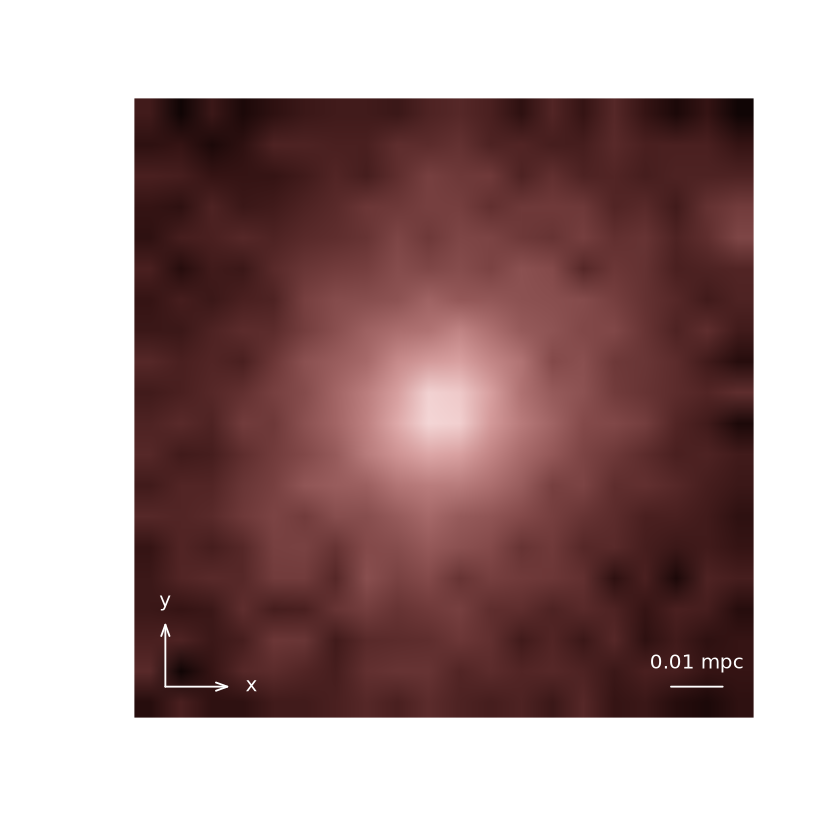

In [18]:
filename = '/home/jyang/data/Flamingo/L0200N0360/halo_particles_recenter/50.hdf5'
#system.file('test_snapshot.hdf5', package='gadgetry')
sn = readsnapshot(filename)

sn$PartType1$smoothing = 1
sn$PartType2$smoothing = 2
sn$PartType2$lum = 1
#sn$PartType2$value=sn$PartType2$lum_gamaz/10**6

sn$PartType0$lum = 0
sn$PartType1$lum = 0

sn$PartType2$col = '#ff4444'#DM
#sn$PartType1$col = '#F7FF00'#Gas
plot(sn, length.unit='mpc', width=0.02*6,kde=0,center=c(0,0,0),npixels = 0.02*1000)


sn$PartType1$lum = 1
sn$PartType2$lum = 0#Gas only
#sn$PartType1$value=sn$PartType1$xray_lum_erosita_low+sn$PartType1$xray_lum_erosita_high
#plot(sn, length.unit='mpc', width=4,center=c(0,0,0),kde=0,npixels = 1000)

ERROR: Error in readsnapshot(filename): File not found: /home/jyang/data/Flamingo/L0200N0360/halo_particles/749aroundfar.hdf5


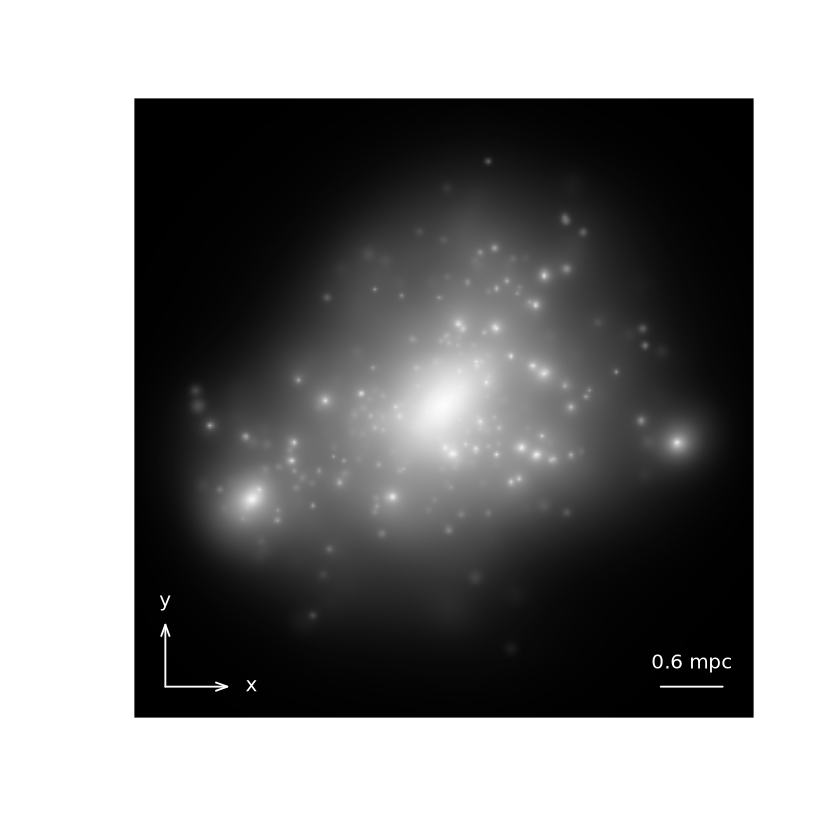

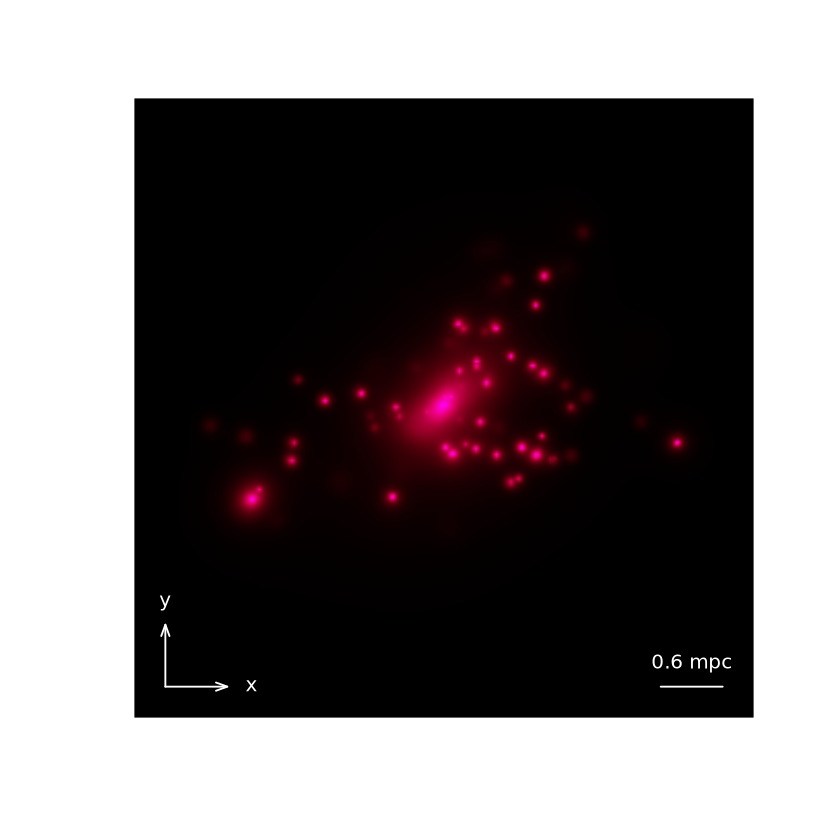

In [9]:
filename = '/home/jyang/data/Flamingo/L0200N0360/halo_particles/103.hdf5'

sn = readsnapshot(filename)

sn$PartType1$smoothing = 2
sn$PartType2$smoothing = 2
sn$PartType2$lum = 1
sn$PartType1$lum = 0
plot(sn,length.unit='mpc', width=6,center=c(0,0,0),npixels=300)



filename = '/home/jyang/data/Flamingo/L0200N0360/halo_particles/103stars.hdf5'
sn = readsnapshot(filename)
sn$PartType0$smoothing = 2
sn$PartType0$lum=1
plot(sn,length.unit='mpc', width=6,npixels=300,center=c(0,0,0))



In [ ]:
name= as.integer(2) 
filename = '/home/jyang/data/Flamingo/L0200N0360/halo_particles/2.hdf5'
#fix the string to long problrm
sn = readsnapshot(filename)
sn$PartType2$lum = 0
sn$PartType1$lum = 1
sn$PartType1$gamma = .8
#print(sn$PartType1$Coordinates[549521,])
#sn2=cooltools::rotation3(c(0,0,pi/2))%*%sn$PartType1$Coordinates[549521,]
#print(sn2)
#sn$PartType1$col=rainbow(100,end=0.1)
sn$PartType1$value=sn$PartType1$xray_lum_erosita_low+sn$PartType1$xray_lum_erosita_high

rotv=array(0,dim=c(5,3,3))
for (x in 1:5){#rotate for a random dirention
  rot=c(runif(3))
#  rot=c(0.3,0.4,0.5)
  rot=rot/length(rot)*runif(1,min=0,max=2*pi)
  rot=round(rot,4)
 
#  rotv[x,]=rot

#Gaussian blur
  P=plot(sn,length.unit='mpc', width=12.82,rotation=rot,kde=0,npixels=1000,,screen=FALSE,center=c(0,0,0),pngfile=paste("/home/jyang/plot/Flamingo/L0200N0720/halo_2d_lum_rotate/test/",toString(rot),".png"))
  print(P$header$rotationmatrix)

  rotv[x,,]=P$header$rotationmatrix

}

file="/home/jyang/data/Flamingo/L02000720/halo_2d_lum_rotate/test.hdf5"



h5createFile(file)
h5createGroup(file, "PartType1")
h5write(P$header$xlim, file = file, name="PartType1/xlim")
h5write(P$header$ylim, file = file, name="PartType1/ylim")
h5write(P$header$center, file = file, name="PartType1/center")
h5write(rotv,file=file,name="PartType1/rot_matrix")
h5write(P$header$rotationmatrix,file=file,name="PartType1/rot")
H5close()



           [,1]      [,2]       [,3]
[1,]  0.4408640 0.7792407 -0.4454468
[2,] -0.7757808 0.5804164  0.2475498
[3,]  0.4514455 0.2364333  0.8604047
           [,1]       [,2]      [,3]
[1,]  0.7278345  0.6640170 0.1712845
[2,] -0.5843882  0.4698970 0.6615793
[3,]  0.3588139 -0.5816168 0.7300510
           [,1]       [,2]       [,3]
[1,]  0.7723239  0.5777375 -0.2640743
[2,] -0.4572517  0.7941929  0.4002231
[3,]  0.4409498 -0.1883534  0.8775456
           [,1]       [,2]       [,3]
[1,]  0.7975780  0.4933095 -0.3471527
[2,] -0.2786894  0.8117482  0.5132223
[3,]  0.5349780 -0.3125870  0.7849126
           [,1]        [,2]       [,3]
[1,] 0.93700322  0.07312099 -0.3415820
[2,] 0.01442442  0.96891343  0.2469791
[3,] 0.34902278 -0.23634737  0.9068203
